In [7]:
import os 
import json 
import matplotlib.pyplot as plt 

LEFT_ROOT_DIR = "../../output/20240829/val_human_left"
RIGHT_ROOT_DIR = "../../output/20240829/val_human_right"
GUIDANCE_SCALES = ['3.0']
LEARNING_RATES = ['1e-4_gate10']
CHECKPOINTS = [0,10,20,30,40,50,60,70,80,90]

In [17]:
# read left accuracy 
left_accuracy = {}
for scale in GUIDANCE_SCALES:
    left_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        left_accuracy[scale][lr] = []
        for checkpoint in CHECKPOINTS:
            checkpoint_dir = os.path.join(LEFT_ROOT_DIR, f"{scale}", "no_controlnet", f"{lr}", f"chk{checkpoint}", "lightning_logs", "version_0")
            with open(os.path.join(checkpoint_dir, "counting.json"), "r") as f:
                accuracy = json.load(f)
                left_accuracy[scale][lr].append(accuracy['left'])

In [18]:
left_accuracy

{'3.0': {'1e-4_gate10': [50, 0, 50, 50, 51, 52, 53, 62, 34, 56]}}

In [19]:
# read left accuracy 
right_accuracy = {}

for scale in GUIDANCE_SCALES:
    right_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        right_accuracy[scale][lr] = []
        for checkpoint in CHECKPOINTS:
            checkpoint_dir = os.path.join(RIGHT_ROOT_DIR, f"{scale}", "no_controlnet", f"{lr}", f"chk{checkpoint}", "lightning_logs", "version_0")
            with open(os.path.join(checkpoint_dir, "counting.json"), "r") as f:
                accuracy = json.load(f)
                right_accuracy[scale][lr].append(accuracy['right'])

In [20]:
right_accuracy

{'3.0': {'1e-4_gate10': [450, 500, 450, 450, 454, 452, 453, 460, 487, 491]}}

In [21]:
both_accuracy = {}
for scale in GUIDANCE_SCALES:
    both_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        both_accuracy[scale][lr] = []
        for idx, checkpoint in enumerate(CHECKPOINTS):
            both_accuracy[scale][lr].append(left_accuracy[scale][lr][idx] + right_accuracy[scale][lr][idx])

In [22]:
both_accuracy

{'3.0': {'1e-4_gate10': [500, 500, 500, 500, 505, 504, 506, 522, 521, 547]}}

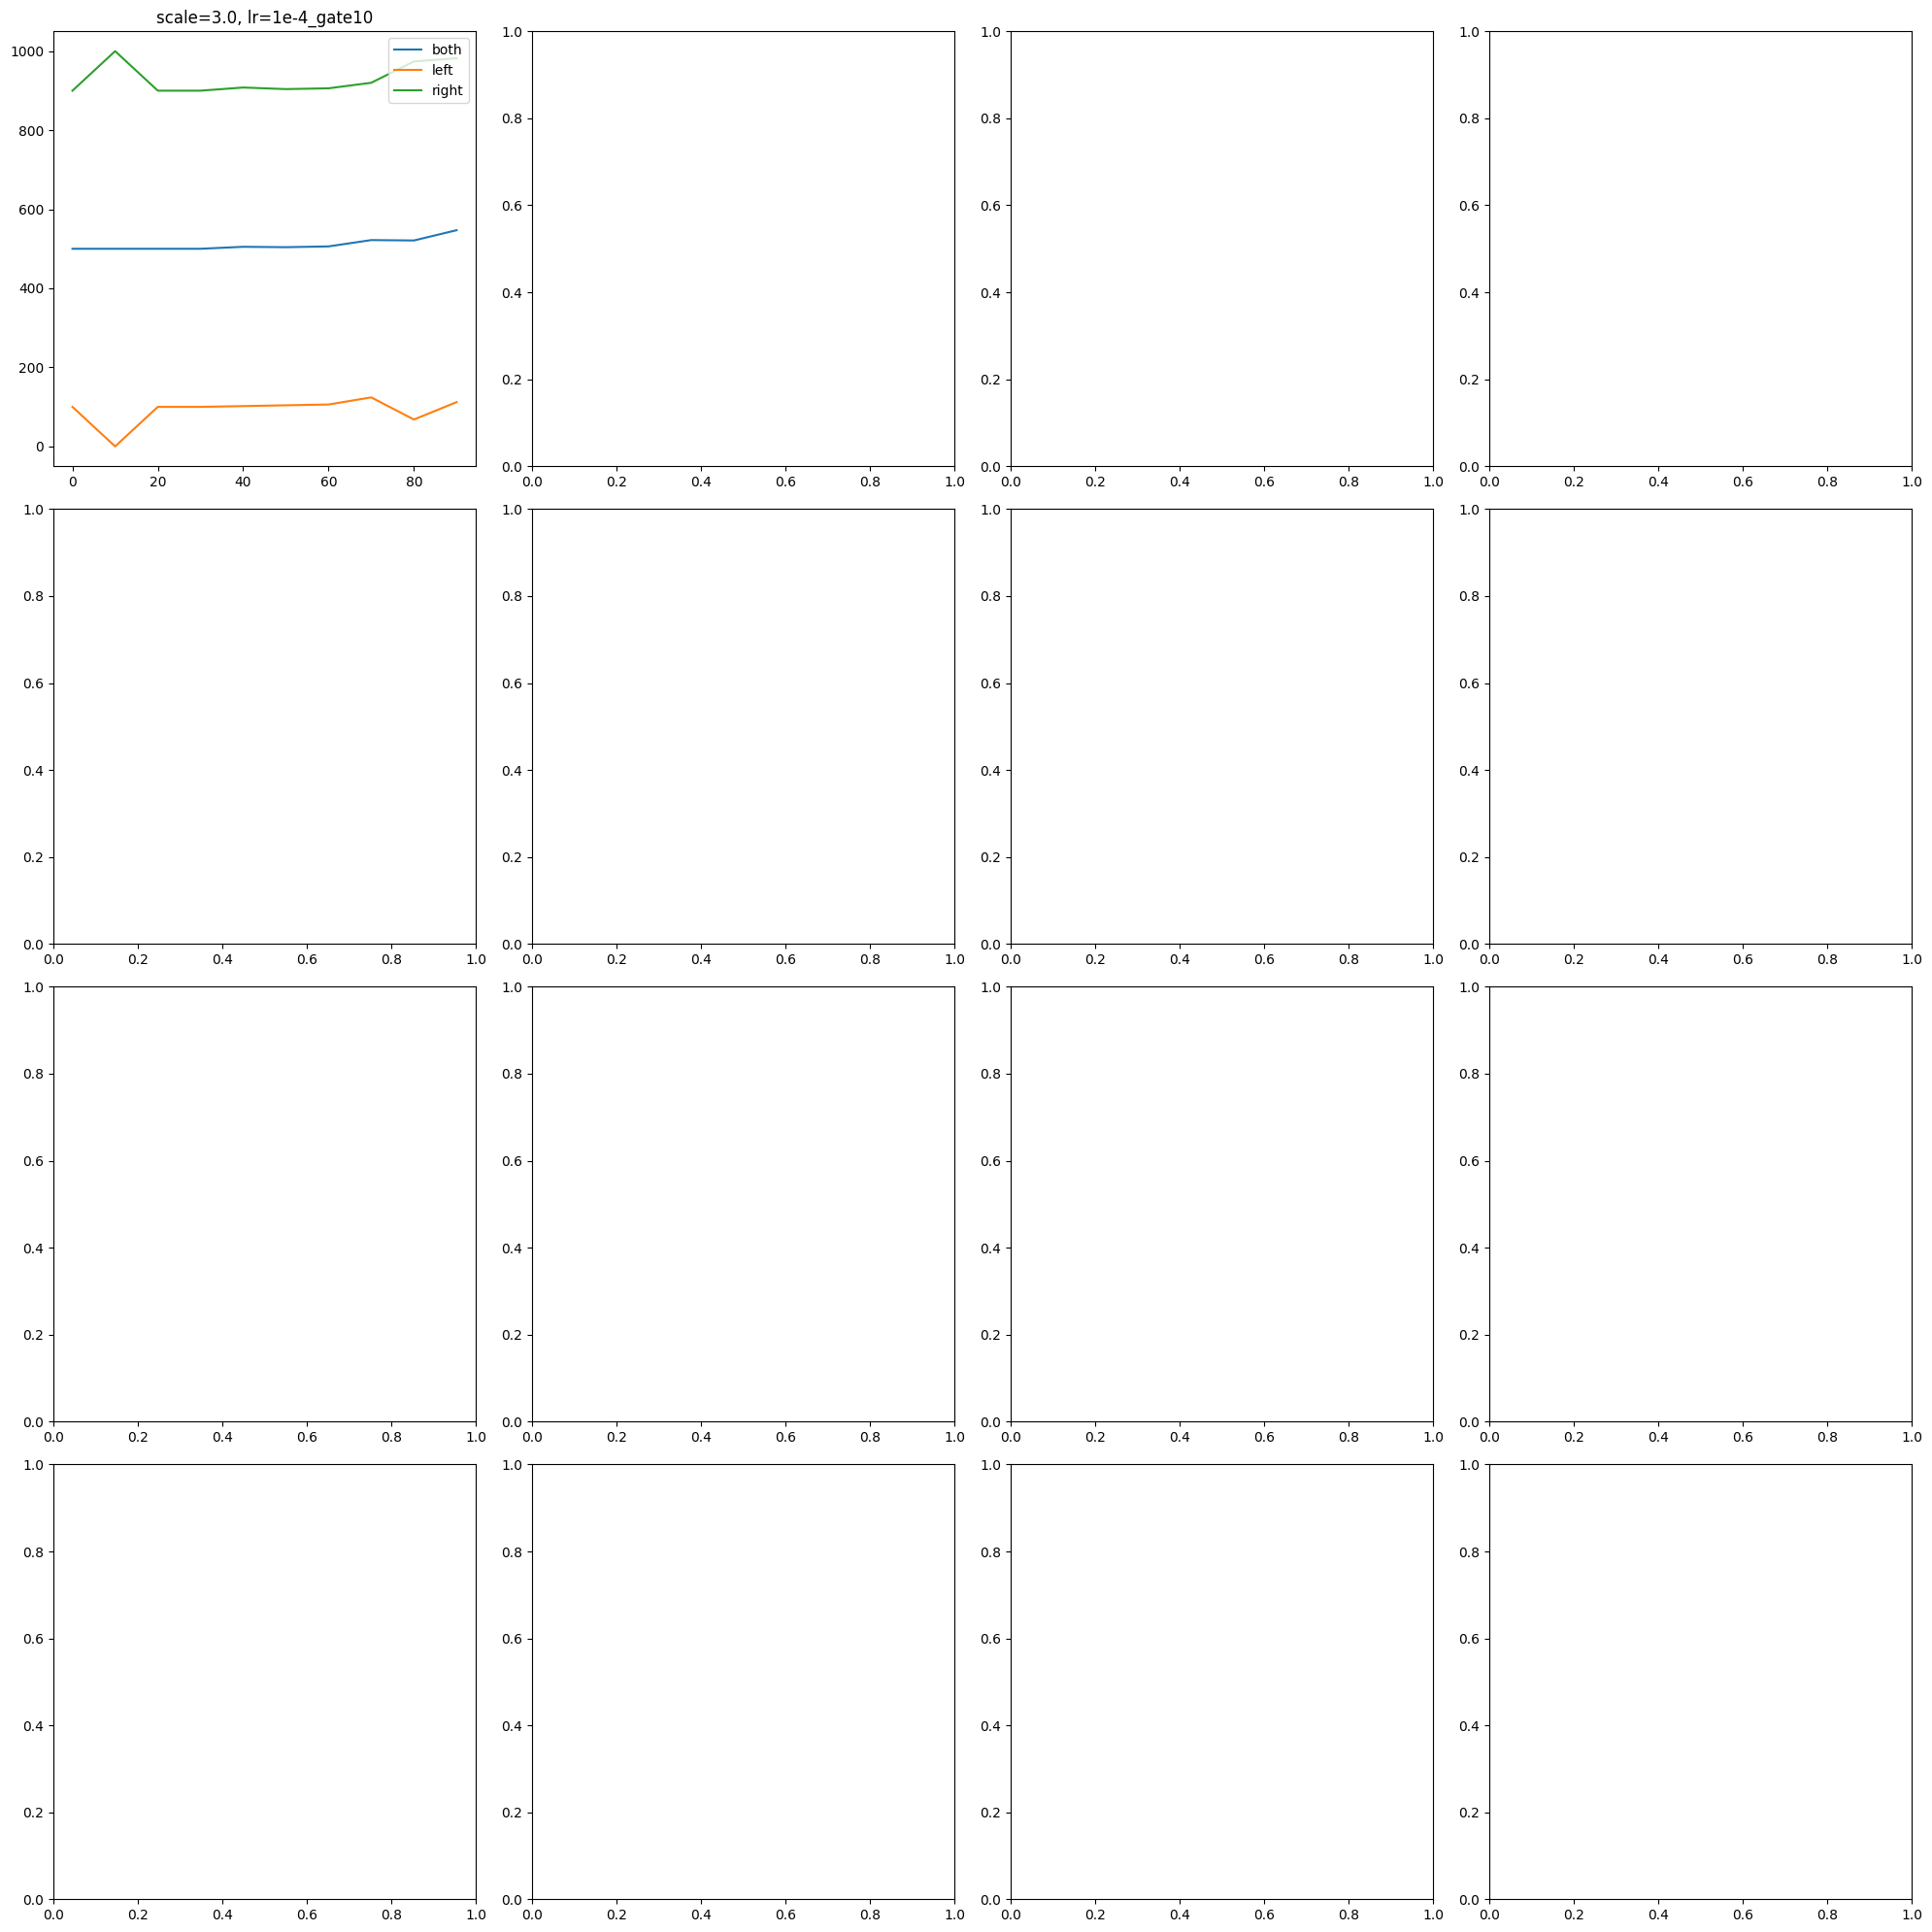

In [23]:
# plot both accuracy
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, scale in enumerate(GUIDANCE_SCALES):
    for j, lr in enumerate(LEARNING_RATES):
        axs[i, j].plot(CHECKPOINTS, both_accuracy[scale][lr], label="both")
        axs[i, j].plot(CHECKPOINTS, [u* 2 for u in left_accuracy[scale][lr]], label="left")
        axs[i, j].plot(CHECKPOINTS, [u * 2 for u in right_accuracy[scale][lr]], label="right")
        axs[i, j].set_title(f"scale={scale}, lr={lr}")
        axs[i, j].legend() 
plt.tight_layout()
plt.show()


In [27]:
both_accuracy[scale][lr]

[500, 500, 500, 500, 505, 504, 506, 522, 521, 547]

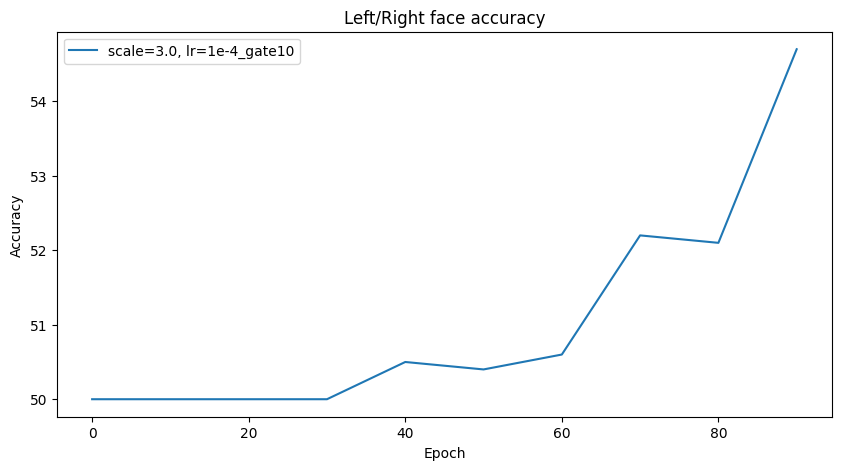

In [32]:
# plot both_accuracy in the single figure contain 16 lines 
a = []
for x in both_accuracy[scale][lr]:
    a.append(x / 10)
fig, ax = plt.subplots(figsize=(10, 5))
for i, scale in enumerate(GUIDANCE_SCALES):
    for j, lr in enumerate(LEARNING_RATES):
        ax.plot(CHECKPOINTS, a, label=f"scale={scale}, lr={lr}")
ax.set_title("Left/Right face accuracy")
ax.legend()
#ax.set_ylim(0, 100)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

KeyError: '1e-4'

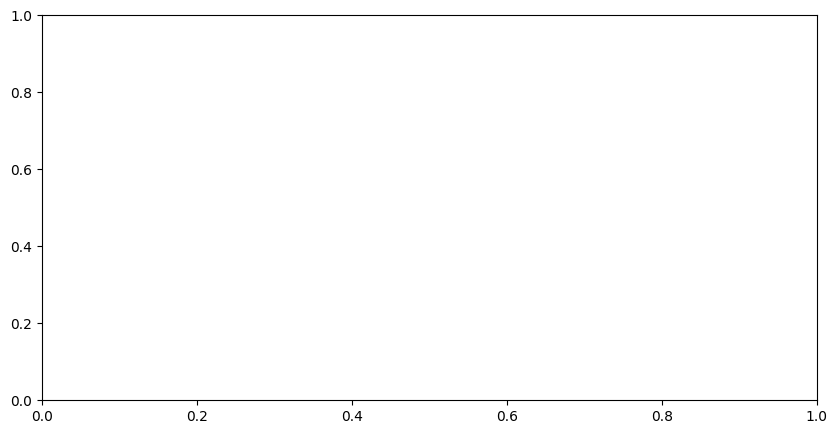

In [25]:
# plot only both_accuracy at scale=3.0, lr=1e-4
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CHECKPOINTS, both_accuracy['3.0']['1e-4'], label="both_accuracy")
ax.set_title("both_accuracy at scale=3.0, lr=1e-4")
ax.legend()
plt.show()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [22]:
lr

'1e-5'